# Application 2: Iris Flower Species Identification 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets, preprocessing 
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
import ipywidgets as widgets
from IPython.display import clear_output

In [3]:
# load iris dataset
features = ['Sepal Length (cm)', 'Sepal Width (cm)', 'Petal Length (cm)', 'Petal Width (cm)']
target = ['Class']
columns = [*features, *target]
data = pd.read_csv('iris.csv', header=None, names=columns)
data

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# look for NaN values in each column
data.isnull().sum()

Sepal Length (cm)    0
Sepal Width (cm)     0
Petal Length (cm)    0
Petal Width (cm)     0
Class                0
dtype: int64

In [5]:
data['Class'].value_counts() 

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Class, dtype: int64

In [6]:
# PREPROCESSING
data['Class'] = data.Class.map({'Iris-versicolor' : 1, 'Iris-virginica' : 2, 'Iris-setosa': 3})

In [7]:
data.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Class
0,5.1,3.5,1.4,0.2,3
1,4.9,3.0,1.4,0.2,3
2,4.7,3.2,1.3,0.2,3
3,4.6,3.1,1.5,0.2,3
4,5.0,3.6,1.4,0.2,3


In [8]:
min_max_scaler = preprocessing.MinMaxScaler()
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values
# Normalize features
X = min_max_scaler.fit_transform(X)
SIZE_TEST = 0.3
X_train, X_test, Y_train, y_test = train_test_split(X, Y, test_size = SIZE_TEST, random_state = 0)

### Logistic Regression

In [9]:
lr_classifier = LogisticRegression(penalty='l2', #Ridge
                                   tol=0.0001,
                                   fit_intercept=True, 
                                   random_state=None, 
                                   max_iter=100)

In [10]:
lr_classifier.fit(X_train, Y_train)

LogisticRegression()

In [11]:
print(f'No. of classes: {lr_classifier.classes_}')
print(f'Coefficients: {lr_classifier.coef_}')
print(f'Intercept: {lr_classifier.intercept_}')
print(f'No. of iterations: {lr_classifier.n_iter_}')

No. of classes: [1 2 3]
Coefficients: [[ 0.14874536 -1.23258074  0.34570317 -0.29091542]
 [ 1.06279823 -0.03430033  2.08164348  2.69660332]
 [-1.21154359  1.26688108 -2.42734666 -2.4056879 ]]
Intercept: [ 0.93721938 -2.82586329  1.88864391]
No. of iterations: [20]


Note:

- If fit_intercept is set to False, the intercept is set to zero.

In [12]:
y_pred = lr_classifier.predict(X_test)

In [13]:
print(confusion_matrix(y_test, y_pred))

[[14  4  0]
 [ 1 10  0]
 [ 0  0 16]]


In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.93      0.78      0.85        18
           2       0.71      0.91      0.80        11
           3       1.00      1.00      1.00        16

    accuracy                           0.89        45
   macro avg       0.88      0.90      0.88        45
weighted avg       0.90      0.89      0.89        45



In [15]:
log ={
    'classifier':[],
    'accuracy':[]
}

In [16]:
log['classifier'].append('LR')
log['accuracy'].append(accuracy_score(y_test, y_pred))

### Linear Discriminant Analysis

In [17]:
lda_classifier = LinearDiscriminantAnalysis(solver='svd', 
                                            shrinkage=None, 
                                            priors=None, 
                                            n_components=None, 
                                            store_covariance=False, 
                                            tol=0.0001, 
                                            covariance_estimator=None
                                           )
# How many dimensions / features were used for the classification?
# If a subset was used, how was it decided?
# Can we see the mean and scatter of each feature used?

In [18]:
lda_classifier.fit(X_train, Y_train)
y_pred = lda_classifier.predict(X_test)

In [19]:
print(confusion_matrix(y_test, y_pred))

[[17  1  0]
 [ 0 11  0]
 [ 0  0 16]]


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11
           3       1.00      1.00      1.00        16

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [21]:
lda_classifier.classes_

array([1, 2, 3], dtype=int64)

In [22]:
lda_classifier.means_

array([[0.45052083, 0.31510417, 0.54184322, 0.50260417],
       [0.65384615, 0.41132479, 0.77922642, 0.80448718],
       [0.19281046, 0.57598039, 0.07676969, 0.05392157]])

In [23]:
log['classifier'].append('LDA')
log['accuracy'].append(accuracy_score(y_test, y_pred))

### Support Vector Machine

In [24]:
svc_classifier = SVC(C=1.0, 
                     kernel='rbf', 
                     degree=3, gamma='scale', 
                     coef0=0.0, 
                     shrinking=True, 
                     probability=False, 
                     tol=0.001, 
                     cache_size=200, 
                     class_weight=None, 
                     verbose=False,
                     max_iter=- 1, 
                     decision_function_shape='ovr', 
                     break_ties=False, 
                     random_state=None)

In [25]:
svc_classifier.fit(X_train, Y_train)
y_pred = svc_classifier.predict(X_test)

In [26]:
print(confusion_matrix(y_test, y_pred))

[[17  1  0]
 [ 0 11  0]
 [ 0  0 16]]


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11
           3       1.00      1.00      1.00        16

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [28]:
log['classifier'].append('SVM')
log['accuracy'].append(accuracy_score(y_test, y_pred))

### KNN Classifier

In [29]:
kn_classifier = KNeighborsClassifier(n_neighbors=5, 
                                     weights='uniform', 
                                     algorithm='auto', #used to identify nearest neighbours
                                     p=2, #euclidean_distance
                                     metric='minkowski')

In [30]:
kn_classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [31]:
print(f'Effective Metric = {kn_classifier.effective_metric_}')

Effective Metric = euclidean


In [32]:
y_pred = kn_classifier.predict(X_test)

In [33]:
print(confusion_matrix(y_test, y_pred))

[[17  1  0]
 [ 0 11  0]
 [ 0  0 16]]


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11
           3       1.00      1.00      1.00        16

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [35]:
log['classifier'].append('KNN')
log['accuracy'].append(accuracy_score(y_test, y_pred))

### Gaussian Naive Bayes Classifier

In [36]:
gnb_classifier = GaussianNB()

In [37]:
gnb_classifier.fit(X_train, Y_train)
y_pred = gnb_classifier.predict(X_test)

In [38]:
print(confusion_matrix(y_test, y_pred))

[[18  0  0]
 [ 0 11  0]
 [ 0  0 16]]


In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        16

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [40]:
log['classifier'].append('GNB')
log['accuracy'].append(accuracy_score(y_test, y_pred))

### Decision Tree

In [41]:
dt_classifier = DecisionTreeClassifier(criterion='gini', 
                                       splitter='best', 
                                       max_depth=None, 
                                       min_samples_split=2, 
                                       min_samples_leaf=1, 
                                       min_weight_fraction_leaf=0.0, 
                                       max_features=None, 
                                       random_state=43, 
                                       max_leaf_nodes=None, 
                                       min_impurity_decrease=0.0, 
                                       class_weight=None, 
                                       ccp_alpha=0.0
                                      )

In [42]:
dt_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=43)

In [43]:
y_pred = dt_classifier.predict(X_test)

In [44]:
print(confusion_matrix(y_test, y_pred))

[[17  1  0]
 [ 0 11  0]
 [ 0  0 16]]


In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11
           3       1.00      1.00      1.00        16

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [46]:
log['classifier'].append('DT')
log['accuracy'].append(accuracy_score(y_test, y_pred))

In [47]:
dt_classifier.feature_importances_

array([0.        , 0.04300928, 0.90006666, 0.05692405])

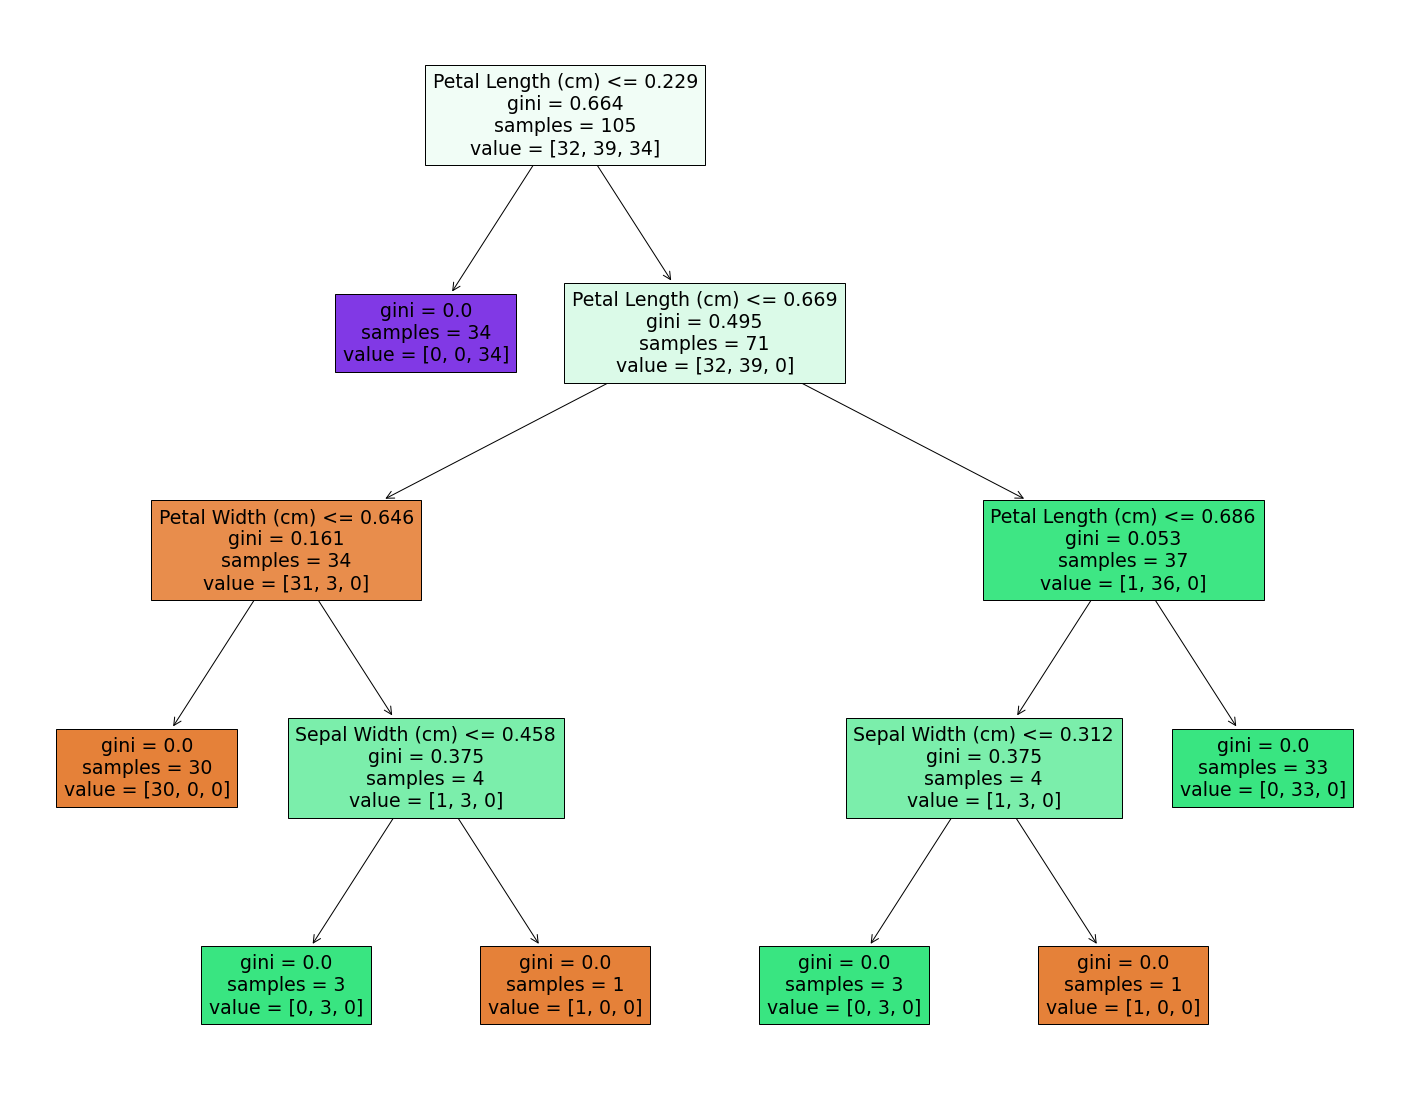

In [48]:
fig = plt.figure(figsize=(25,20))
plot_tree(dt_classifier, 
              feature_names = data.columns[0:-1],
              filled=True)
plt.show()

In [49]:
#fig.savefig("decision_tree.png")

### Random Forest

In [50]:
rf_classifier = RandomForestClassifier(n_estimators=100, 
                                       criterion='gini', 
                                       max_depth=None, 
                                       min_samples_split=2, 
                                       min_samples_leaf=1, 
                                       min_weight_fraction_leaf=0.0, 
                                       max_features='auto', 
                                       max_leaf_nodes=None, 
                                       min_impurity_decrease=0.0, 
                                       min_impurity_split=None, 
                                       bootstrap=True, 
                                       oob_score=False, 
                                       n_jobs=None, 
                                       random_state=43, 
                                       verbose=0, 
                                       warm_start=False, 
                                       class_weight=None, 
                                       ccp_alpha=0.0, 
                                       max_samples=None)

In [51]:
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=43)

In [52]:
y_pred = dt_classifier.predict(X_test)

In [53]:
print(confusion_matrix(y_test, y_pred))

[[17  1  0]
 [ 0 11  0]
 [ 0  0 16]]


In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11
           3       1.00      1.00      1.00        16

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [55]:
log['classifier'].append('RF')
log['accuracy'].append(accuracy_score(y_test, y_pred))

In [56]:
# Extract single tree
# estimator = rf_classifier.estimators_[0]

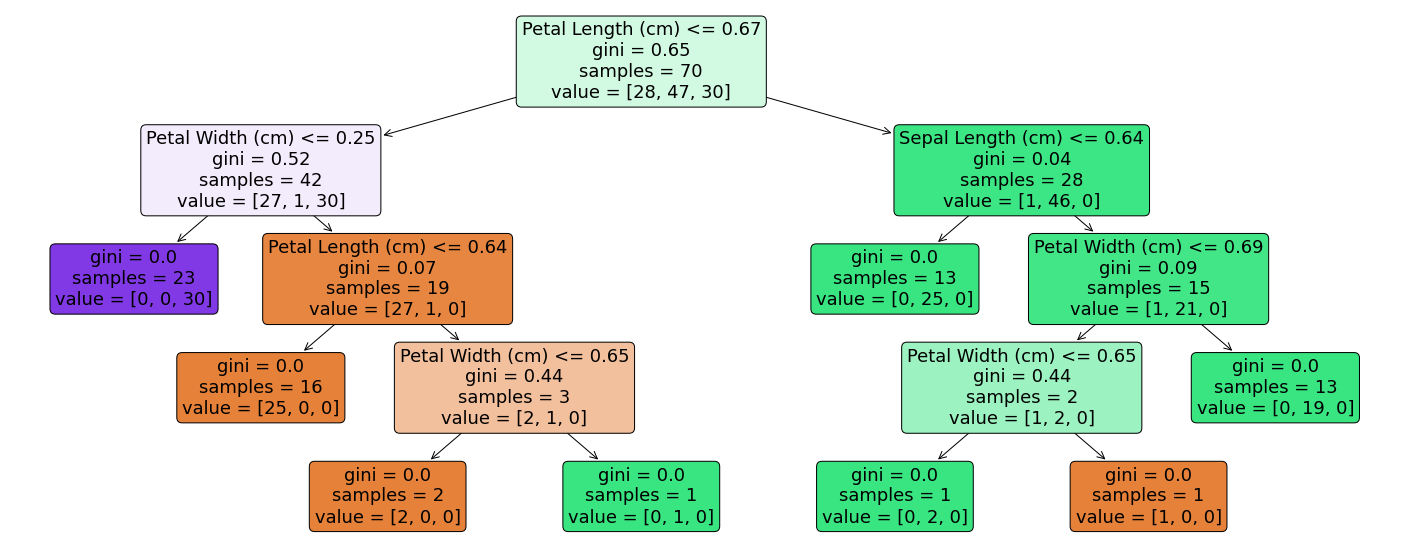

In [57]:
fig = plt.figure(figsize=(25,10))
plot_tree(rf_classifier.estimators_[0], 
                  max_depth = 5,
                  feature_names = data.columns[0:-1],
                  rounded = True, 
                  precision = 2,
                  filled = True,
                  )
plt.show()

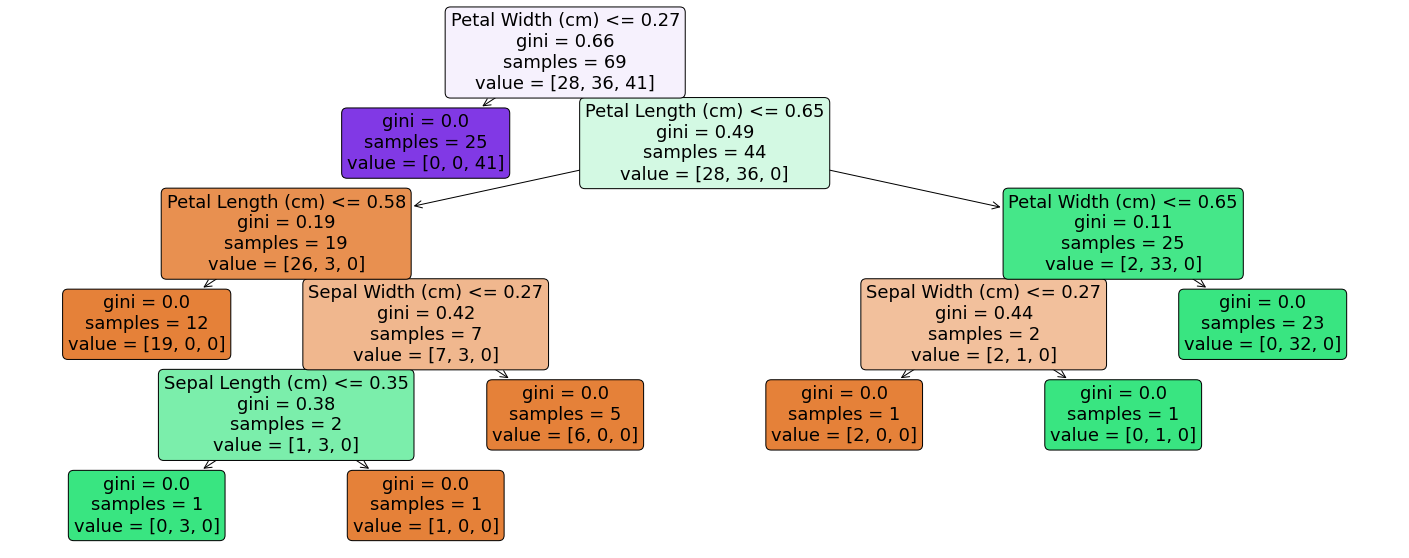

In [58]:
fig = plt.figure(figsize=(25,10))

plot_tree(rf_classifier.estimators_[1], 
                  max_depth = 5,
                  feature_names = data.columns[0:-1],
                  rounded = True, 
                  precision = 2,
                  filled = True,
                  )
plt.show()

## Accuracy Plot

In [59]:
log_df = pd.DataFrame(log )

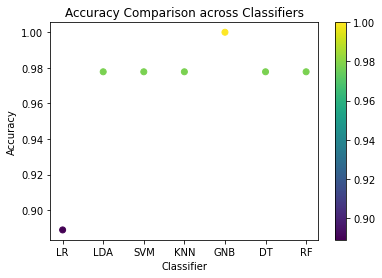

In [60]:
plt.scatter(log_df['classifier'], log_df['accuracy'], c=log_df['accuracy'])
plt.colorbar()
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison across Classifiers')
plt.show()

In [61]:
sepal_length = widgets.Text(description="Sepal Length")
sepal_width = widgets.Text(description="Sepal Width")
petal_length = widgets.Text(description="Petal Length")
petal_width = widgets.Text(description="Petal Width")

In [62]:
display(sepal_length)
display(sepal_width)
display(petal_length)
display(petal_width)

Text(value='', description='Sepal Length')

Text(value='', description='Sepal Width')

Text(value='', description='Petal Length')

Text(value='', description='Petal Width')

In [63]:
algorithm = widgets.Dropdown(
    options = [('Logistic Regression', 'LR'), 
               ('Linear Discriminant Analysis ', 'LDA'), 
               ('Support Vector Machines', 'SVM'),
               ('K-Nearest Neighbors', 'KN'),
               ('Naive Bayes', 'NB'),
               ('Decision Trees', 'DT'),
               ('Random Forest', 'RF'),
              ],
    disabled = False,
)

print('Select Algorithm')
display(algorithm)

Select Algorithm


Dropdown(options=(('Logistic Regression', 'LR'), ('Linear Discriminant Analysis ', 'LDA'), ('Support Vector Ma…

In [64]:
prediction = widgets.Output()

button_predict = widgets.Button(description="Predict")

def on_button_predict_clicked(b):
    
    input_data = {}
    input_data['sepal_length'] = float(sepal_length.value)
    input_data['sepal_width'] = float(sepal_width.value)
    input_data['petal_length'] = float(petal_length.value)
    input_data['petal_width'] = float(petal_width.value)

    user_input = pd.DataFrame(input_data, columns = ['sepal_length','sepal_width','petal_length','petal_width'], index=[0])
    
    selected_algorithm = algorithm.value
    
    if selected_algorithm == 'LR':
        classifier = lr_classifier
    elif selected_algorithm == 'LDA':
        classifier = lda_classifier
    elif selected_algorithm == 'SVM':
        classifier = svc_classifier        
    elif selected_algorithm == 'KN':
        classifier = kn_classifier
    elif selected_algorithm == 'NB':
        classifier = gnb_classifier
    elif selected_algorithm == 'DT':
        classifier = dt_classifier
    elif selected_algorithm == 'RF':
        classifier = rf_classifier
        
    with prediction:
        clear_output(True)
        print(f'Selected Algorithm = {selected_algorithm}')
        print(classifier.predict(user_input)[0])
        
button_predict.on_click(on_button_predict_clicked)

In [65]:
display(button_predict)
display(prediction)

Button(description='Predict', style=ButtonStyle())

Output()